# Python for Data Science, Level I
### *Session \#5*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Pandas Basics

### Warm Ups

---

**Importing pandas:** `import pandas as pd`

In [78]:
import pandas as pd

**Dataframe from CSV:** `inspect_df = pd.read_csv("restaurant_inspections_nyc.csv", dtype={"ZIPCODE": "str"})`

*Note: Input string can be a URL or a local file path*

In [ ]:
inspect_df = pd.read_csv("restaurant_inspections_nyc.csv", dtype={"ZIPCODE": "str"})

**See column data types:** `inspect_df.dtypes`

In [ ]:
inspect_df.dtypes

**First 5 lines of file:** `inspect_df.head()` 

In [ ]:
inspect_df.head()

**Boolean indexing on rows:** `inspect_df[(inspect_df['GRADE'] == 'C') & (inspect_df['ZIPCODE'] == '11238')]`

In [ ]:
inspect_df[(inspect_df['GRADE'] == 'C') & (inspect_df['ZIPCODE'] == '11238')]

**Frequency of values within a column:** `inspect_df['GRADE'].value_counts()`

Note: This [guide to restaurant grading](https://www1.nyc.gov/assets/doh/downloads/pdf/rii/restaurant-grading-faq.pdf) can help with interpreting these numbers

In [ ]:
inspect_df['GRADE'].value_counts()

**Aggregate with Numpy functions:** `inspect_df['SCORE'].mean()`

In [ ]:
inspect_df['SCORE'].mean()

**Save to CSV:** `inspect_df.to_csv("new_file.csv")`

In [ ]:
inspect_df.to_csv("new_file.csv")

## Exercises
---

**1. Which boro had more** `C` **ratings, Brooklyn or Manhattan?**

In [93]:
c_grade = inspect_df['GRADE'] == "C"
brooklyn = inspect_df['BORO'] == "BROOKLYN"
manhattan = inspect_df['BORO'] == "MANHATTAN"

bk_c_count = len(inspect_df[c_grade & brooklyn])
mn_c_count = len(inspect_df[c_grade & manhattan])

print(f"Brooklyn had {bk_c_count} C grade inspections")
print(f"Manhattan had {mn_c_count} C grade inspections")

Brooklyn had 2050 C grade inspections
Manhattan had 3241 C grade inspections


**2. What is the average inspection score in your neighborhood? Is it higher or lower than the overall overage?** 

In [96]:
overall_avg = inspect_df['SCORE'].mean()
neighborhood_avg = inspect_df[inspect_df['ZIPCODE'] == '11238']['SCORE'].mean()

print(f"Overall avg: {overall_avg} Neighborhood avg: {neighborhood_avg}")

Overall avg: 19.915540853345455 Neighborhood avg: 18.944814462416748


**3. For inpections resulting in a** `C` **grade, what is the most common violation description?**

In [100]:
c_grade = inspect_df['GRADE'] == "C"
inspect_df[c_grade]['VIOLATION DESCRIPTION'].value_counts().index[0]

'Facility not vermin proof. Harborage or conditions conducive to attracting vermin to the premises and/or allowing vermin to exist.'

**4. For inspections resulting in a** `A` **grade, what is the most common ZIP code?**

In [102]:
a_grade = inspect_df['GRADE'] == "A"
inspect_df[a_grade]['ZIPCODE'].value_counts().index[0]

'10019'

### Extra Credit
---
**1. Which type of restaurant had a worse inspection score on average -- restaurants with a** `CUISINE DESCRIPTION` **of** `'Donuts'` **or** `'Juice, Smoothies, Fruit Salads'`**?**

In [106]:
donuts = inspect_df['CUISINE DESCRIPTION'] == 'Donuts'
juice = inspect_df['CUISINE DESCRIPTION'] == 'Juice, Smoothies, Fruit Salads'

donut_score = inspect_df[donuts]['SCORE'].mean()
juice_score = inspect_df[juice]['SCORE'].mean()

print(f"Donut shop avg score: {round(donut_score,2)}")
print(f"Juice shop avg score: {round(juice_score,2)}")

Donut shop avg score: 13.54
Juice shop avg score: 18.95


## II. Combining Data


### Warm Ups
---

**Dataframe from Excel**: `kick_df = pd.read_excel("kickstarter.xlsx", sheet_name="most_backed")`

In [107]:
kick_df = pd.read_excel("kickstarter.xlsx", sheet_name="most_backed")

**Create new column:** `kick_df['min_pledge'] = kick_df['amt.pledged'] / kick_df['num.backers']`

In [108]:
kick_df['min_pledge'] = kick_df['amt.pledged'] / kick_df['num.backers']

**Create a dataframe by selecting columns:** `loc_and_amt = kick_df[['location', 'amt.pledged']]`

**Group by a column:** `loc_and_amt.groupby('location').sum()`

**Sort dataframe ascending/descending based on column:** `kick_df.sort_values('num.backers')` **or** `kick_df.sort_values('num.backers', ascending=False)`

**Save to Excel:** `kick_df.to_excel("new_kickstarter.xlsx", sheet_name="most_backed")`

### Exercises
---
**1. Add a new column** `dollars_per_backer` **tracking the amount of fundraising per backer. First filter to only use campaigns with** `usd` **as their currency.**

In [109]:
new_df = kick_df[kick_df.currency == "usd"].copy()

new_df['dollars_per_backer'] = new_df['amt.pledged'] / new_df['num.backers']

**2. What was the campaign with the largest amount of fundraising per backer? The smallest amount?**

In [140]:
backers = new_df.sort_values('dollars_per_backer')

print(f"Max per backer: {backers.iloc[0]['title']}")
print(f"Min per backer: {backers.iloc[-1]['title']}")


Max per backer: Where Art Thou, Romeo?
Min per backer: SpeedX Leopard | the first ever smart aero road bike


**3. Which categories raised the largest amounts of money on average? The least?**

In [146]:
category_avg_raised = new_df.groupby('category')['amt.pledged'].mean().sort_values()

print("Category with smallest avg funding: " + category_avg_raised.index[0])
print("Category with largest avg funding: " + category_avg_raised.index[-1])

Category with smallest avg funding: Music Videos
Category with largest avg funding: Television


**4. What was the average ratio between amount pledged and the funding goal in each category?**

In [158]:
new_df['ratio'] = new_df['amt.pledged'] / new_df['goal']
new_df.groupby('category')['ratio'].mean()

category
3D Printing               16.851171
Academic                   1.219653
Accessories               15.460622
Action                     3.150095
Animation                  2.611470
Anthologies                3.096457
Apparel                   13.091547
Apps                      75.242004
Architecture               3.283888
Art                        2.596699
Art Books                 11.848971
Audio                      1.178783
Calendars                  5.901196
Camera Equipment          11.326773
Children's Books          12.757324
Childrenswear              3.859789
Chiptune                   7.952060
Civic Design               1.307194
Classical Music            5.242474
Comedy                     3.268463
Comic Books                4.647347
Comics                     8.487961
Conceptual Art             1.269820
Cookbooks                  4.768636
Country &amp; Folk         1.509299
Crafts                     9.796588
DIY Electronics           19.218261
Dance              

### Extra Credit
---
**1. If you were hired as a Kickstarter consultant, what are some recommendations you would give to someone looking to have a successful campaign?**

**There is another sheet in the .xlsx file named** `"live"` **which contains a sample of currently running campaigns, so you can compare successful campaigns to a mix of average ones.**

In [227]:
live_df = pd.read_excel("kickstarter.xlsx", sheet_name="live")

live_percent_ca = live_df.location.str.endswith("CA").sum() / len(live_df)
best_percent_ca = kick_df.location.str.endswith("CA").sum() / len(kick_df)

print(f"Average proportion of CA campaigns: {live_percent_ca}" )
print(f"Proportion of most successful campaigns from CA: {best_percent_ca}")

# 1. Go where successful campaigns historically happen: California

# Campaigns from California make up a disproportional amount of the most successful campaigns on Kickstarter. 
# There could be several explanations -- perhaps wealthy funders are more likely to be from California
# and favor local projects, or perhaps access to actors makes for better marketing. Either way, go where conditions
# are favorable.

live_percent_price = live_df.blurb.str.contains("phone").sum() / len(live_df)
best_percent_price = kick_df.blurb.str.contains("phone").sum() / len(kick_df)

print(f"Average proportion of campaigns mentioning phone: {live_percent_price}" )
print(f"Proportion of most successful campaigns mentioning phone: {best_percent_price}")

# 2. Highly successful Kickstarter projects are much more likely to be phone-related than average. 
#
# Perhaps because people are using their smartphones for an increasing fraction of the day,
# products that explicitly mention phones are disproportionately represented among the most
# successful campaigns on Kickstarter. This niche is almost four times larger in the set of 
# most successful campaigns compared to the average.

Average proportion of CA campaigns: 0.1305
Proportion of most successful campaigns from CA: 0.2365
Average proportion of campaigns mentioning phone: 0.0135
Proportion of most successful campaigns mentioning phone: 0.05


## III. Strings and NaNs


### Warm Ups
---

**Contains string:** `kick_df['blurb'].str.contains('new')`

**Replace:** `kick_df['blurb'] = kick_df['blurb'].str.replace("\n", "")`

**Starts/ends with:** `kick_df['blurb'].str.startswith("The")` or `kick_df['blurb'].str.endswith("help!")`

**Select rows with NaN in GRADE column:** `inspect_df[inspect_df['GRADE'].isnull()]`

**Select rows with non-NaN values in GRADE column:** `inspect_df[inspect_df['GRADE'].notnull()]` 

**Fill all NaN values in a column:** `inspect_df['GRADE'].fillna('NOT RATED')`

### Exercises
---
**1. How many restaurants in Brooklyn have had inspections with a missing GRADE?**

In [152]:
len(inspect_df[inspect_df['GRADE'].isnull()])

124953

**2. What percentage of kickstarter campaign blurbs contain the word** `family` **?**

In [151]:
rows_with_family = kick_df[kick_df['blurb'].str.contains("family")]
len(rows_with_family)/len(kick_df)

0.00675

**3. How many McDonalds have received a** `C` **grade from DOHMH?**

In [ ]:
mcd = inspect_df[inspect_df['DBA'].]

**4. What is the average inspection score for restaurants with names that start or end with** `CAFE` **?**

In [154]:
start = inspect_df['DBA'].str.startswith("CAFE")
end = inspect_df['DBA'].str.endswith("CAFE")

inspect_df[start | end]['SCORE'].mean()

20.01741031662483

### Extra Credit
---

**1. Many restaurants without a grade were given an inspection score, which can be used to derive a grade. Those that get 0 and 13 points earn an A, those with 14 to 27 points receive a B and those with 28
or more a C.**

**Use boolean indexing to fill in those missing grades that can be derived.**

In [162]:
nulls = inspect_df['GRADE'].isnull()
a_score = inspect_df['SCORE'] <= 13
b_score = (14 <= inspect_df['SCORE']) & (inspect_df['SCORE'] <= 27)
c_score = 28 <= inspect_df['SCORE']

inspect_df.loc[nulls & a_score, 'GRADE'] = 'A'
inspect_df.loc[nulls & b_score, 'GRADE'] = 'B'
inspect_df.loc[nulls & c_score, 'GRADE'] = 'C'

## IV. Timeseries Data
---

### Warm Ups

**Read CSV with data column as index:** `stock_df = pd.read_csv("stock_closing_prices_2017.csv", parse_dates=['Date'], index_col='Date')`

In [11]:
stock_df = pd.read_csv("stock_closing_prices_2017.csv", parse_dates=['Date'], index_col='Date')

**See summary statistics:** `stock_df.describe()`

'AMZN'

**Compute correlation between columns:** `stock_df.corr()`

**Get year/month/day with partial string index:** `df['2017']` or `df['2017-02']` or `df['2017-02-01']`

**Use an explicit or implicit index:** `stock_df.loc['2017']` or `stock_df.iloc[3]`

**Create a basic plot of two column:** `stock_df[['VZ', 'GS']].plot()`

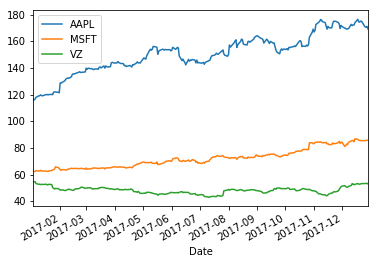

### Exercises
---
**1. Which stock was most correlated with AAPL over 2017? Least correlated?**

In [117]:
aapl_corr = stock_df.corr()['AAPL'].sort_values(ascending=False)
most_corr = aapl_corr.index[1]
least_corr = aapl_corr.index[-1]


print(f"Most correlated: {most_corr}")
print(f"Least correlated: {least_corr}")

Most correlated: MSFT
Least correlated: VZ


**2. Create a plot of these three stocks.**

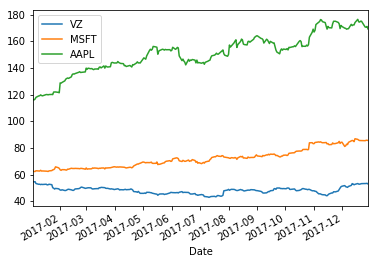

In [119]:
stock_df[['VZ', "MSFT", "AAPL"]].plot()

**3. You can use slices on timeseries data too:** `stock_df[:"2017-06"]`

**Note that the final item is included in an explicit index. Which three-month quarter of the year did AAPL have its highest average price?**

In [124]:
q1 = stock_df['AAPL'][:'2017-03'].mean()
q2 = stock_df['AAPL']['2017-04':'2017-06'].mean()
q3 = stock_df['AAPL']['2017-07':'2017-09'].mean()
q4 = stock_df['AAPL']['2017-10':].mean()

avg_price = [q1, q2, q3, q4]

for i in range(4):
    print(f"Avg price for Q{i+1} was: {avg_price[i]}")

Avg price for Q1 was: 131.71241935483872
Avg price for Q2 was: 147.87539682539685
Avg price for Q3 was: 155.16904761904763
Avg price for Q4 was: 167.14825396825398


**4. If you could only buy/sell once in 2017, which stock should you have traded?**

Hint: You can use .describe() or Numpy functions

In [110]:
stats = stock_df.describe()
differences = stats.loc['max'] - stats.loc["min"]
differences.idxmax()

'AMZN'

In [125]:
import matplotlib.pyplot as plt

def create_graph(symbol_list):
    smaller_df = stock_df[symbol_list]
    smaller_df.plot()
    plt.savefig(",".join(symbol_list)+".pdf")

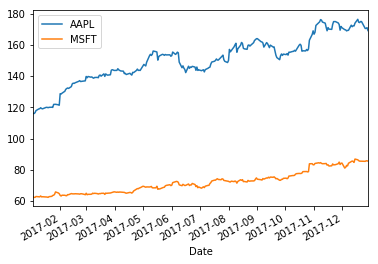

In [126]:
create_graph(["AAPL", "MSFT"])